<a href="https://colab.research.google.com/github/Josephine-Analytics/Logistics-regression/blob/main/ML_Logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import linear_model

In [63]:
df = pd.read_csv('//content/drive/MyDrive/HR_comma_sep 1.csv')
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [64]:
# Rename the column 'average_montly_hours' to 'average_monthly_hours'
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
#checking for duplicates and dropping them
df.drop_duplicates(inplace = True)

In [67]:
#checking for nulls
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [68]:
#employeers who left vs those who stayed
df["left"].value_counts()

,count
left,
0,10000
1,1991


**10,000 employees stayed and 1,991 employees left**

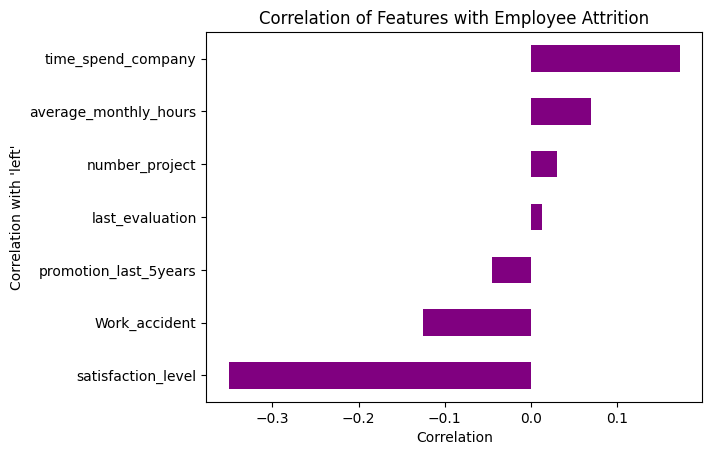

In [69]:
# Compute correlation between numeric features (independent variables) and target variable(left)

corr = df.corr(numeric_only=True)['left'].drop('left')

# Sort values so strongest relationships show clearly
corr = corr.sort_values()

# Plot as bar chart to clearly see relationship strength
corr.plot(kind='barh', color = "purple")
plt.title("Correlation of Features with Employee Attrition")
plt.ylabel("Correlation with 'left'")
plt.xlabel("Correlation")
plt.xticks(rotation=0)
plt.show()

**Satisfaction level showed a strong negative correlation with employee attrition, indicating that employees with lower satisfaction are significantly more likely to leave the company.**

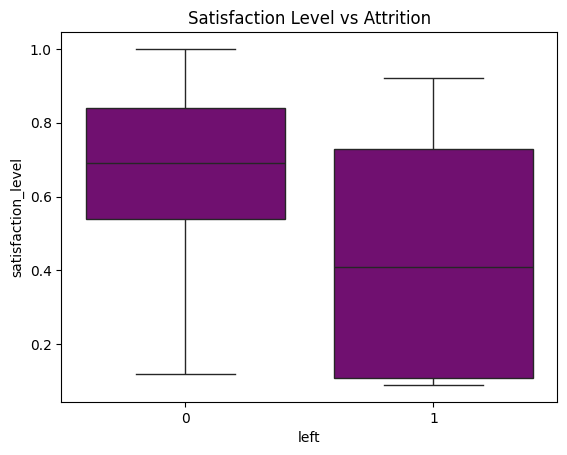

In [70]:
# Compare satisfaction distribution for those who left vs stayed

sns.boxplot(x='left', y='satisfaction_level', data=df, color = "purple")

plt.title("Satisfaction Level vs Attrition")
plt.show()


Plot bar charts showing impact of employee salaries on retention




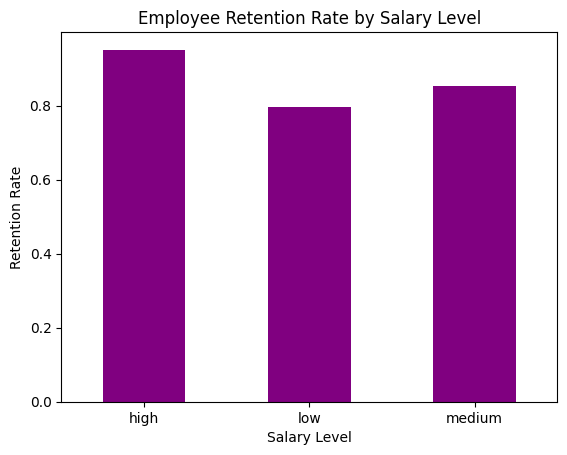

In [71]:
# Compute retention rate by salary level, 0 - stayed and 1 for left
retention_by_salary = 1 - df.groupby('salary')['left'].mean() # 1

# Plot bar chart
retention_by_salary.plot(kind='bar', color = "purple")

plt.title("Employee Retention Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Retention Rate")
plt.xticks(rotation=0)
plt.show()


Plot bar charts showing corelation between department and employee retention

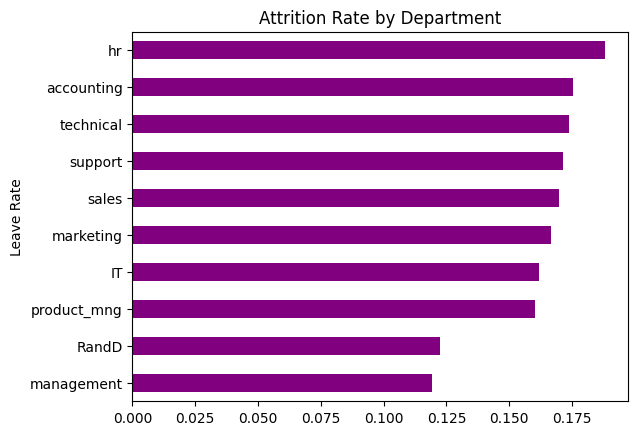

In [72]:
# Calculate leaving rate per department
dept_rate = df.groupby('Department')['left'].mean().sort_values()
dept_rate.plot(kind='barh', color = "purple")
plt.title("Attrition Rate by Department")
plt.ylabel("Leave Rate")
plt.show()


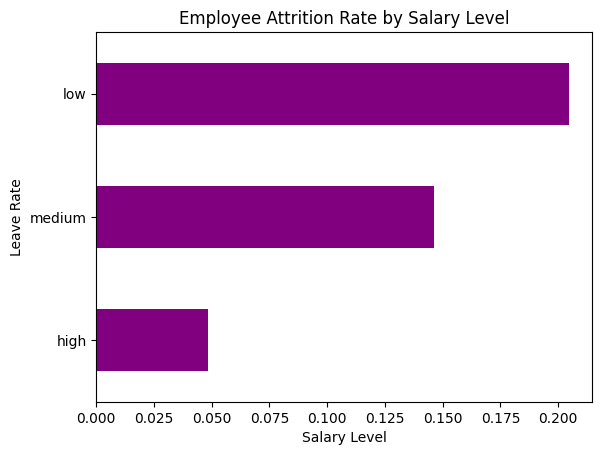

In [73]:
# Group by salary level and compute average leaving rate
salary_retention = df.groupby('salary')['left'].mean().sort_values (ascending = True)
salary_retention.plot(kind='barh', color = "purple")
plt.title("Employee Attrition Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Leave Rate")
plt.show()


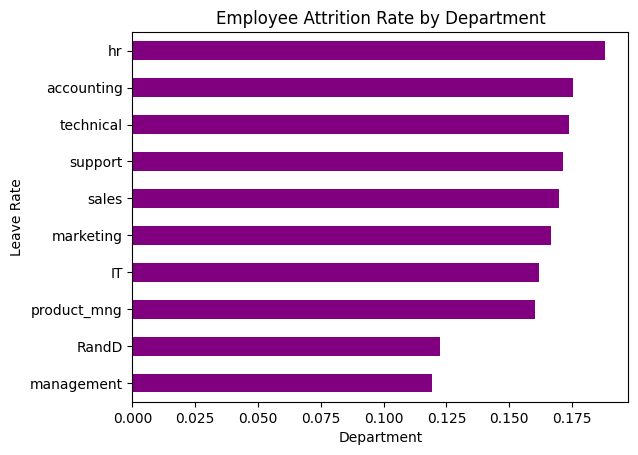

In [74]:
# Calculate retention rate (stayed = 1-left) per department
dept_attrition = df.groupby('Department')['left'].mean().sort_values (ascending = True)

# Plot attrition rate first (who left)
dept_attrition.plot(kind='barh', color = "purple")

plt.title("Employee Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Leave Rate")
plt.xticks(rotation=0)
plt.show()


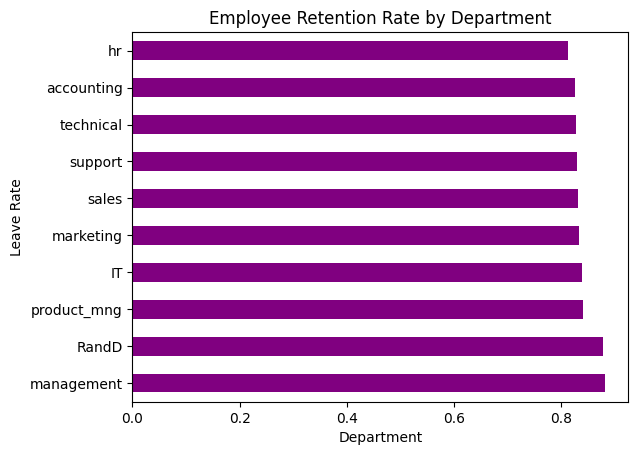

In [75]:
#Now compute for attrition rate (left) per department
dept_retention = 1 - df.groupby('Department')['left'].mean().sort_values (ascending = True)

# Plot attrition rate first (who left)
dept_retention.plot(kind='barh', color = "purple")

plt.title("Employee Retention Rate by Department")
plt.xlabel("Department")
plt.ylabel("Leave Rate")
plt.xticks(rotation=0)
plt.show()

Now build logistic regression model using variables that were narrowed down in step 1

In [76]:
y = df['left'] #independent variable

X = df[['salary',
        'Department']]



In [77]:
#convert categorical data to numeric
X = pd.get_dummies(X).astype(int)
X.head()

,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0


In [78]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [80]:
# Predict on test data
y_pred = model.predict(X_test)


Measure the accuracy of the model

In [81]:
#test the model accuracy
np.round(model.score(X_test, y_test),2)


np.float64(0.55)

**Using only the narrowed EDA features, the logistic regression model produced 55% test accuracy, indicating limited but meaningful predictive signal.**

In [83]:
#MODEL WITH MORE VARIABLES
# Expanded feature set (numeric + important categorical)
X = df[['satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_monthly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years',
        'salary',
        'Department']]

y = df['left']


In [84]:
#convert categorical data to numeric
X = pd.get_dummies(X).astype(int)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0,0,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [86]:
#TRAIN, TEST, SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#CREATE MODEL
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight='balanced')

#FIT MODEL
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [89]:
#PREDICT MODEL
model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [91]:
y_test

,left
397,1
3107,0
9331,0
357,1
1326,1
...,...
9322,0
10440,0
3077,0
6113,0


In [93]:
X_test

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
397,0,0,6,293,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3107,0,0,4,154,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9331,0,0,4,212,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
357,0,0,2,149,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1326,0,0,6,272,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,0,0,3,212,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
10440,0,0,5,111,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3077,0,0,3,181,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6113,0,0,4,146,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [94]:
y_train

,left
6426,0
288,1
5051,0
11132,0
3687,0
...,...
11973,0
5200,0
5399,0
861,1


In [95]:
X_train

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
6426,0,0,5,141,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
288,0,0,5,232,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5051,0,0,3,148,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11132,0,0,4,129,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3687,0,0,3,156,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0,0,4,178,8,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
5200,0,0,4,216,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5399,0,0,5,190,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
861,0,0,2,144,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [96]:
#measure the model"s accuracy on these added variables
np.round(model.score(X_test, y_test),2)

np.float64(0.67)

**The logistic regression model, when trained with the expanded set of features, achieved a test accuracy of 67%.** This marks a significant improvement over the previous model, which used only Salary and Department features and yielded 55% accuracy. The inclusion of additional factors such as satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, and Work_accident has allowed the model to capture more nuanced patterns related to employee attrition. While 67% is a decent starting point, there is still room for improvement, potentially through feature engineering, more advanced modeling techniques, or handling class imbalance more explicitly.

# Employee Attrition Analysis

## Project Overview

This project focuses on analyzing employee attrition using a dataset containing various employee-related metrics. The goal is to identify key factors influencing whether employees leave the company and to build a predictive model to forecast attrition.

## Dataset

The dataset `HR_comma_sep 1.csv` contains information such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent in the company, work accidents, promotions in the last 5 years, department, and salary, along with a target variable indicating whether an employee has 'left' the company.

## Exploratory Data Analysis (EDA) Key Findings

During the exploratory data analysis phase, several important insights were uncovered:

*   **Satisfaction Level**: Showed a strong negative correlation with employee attrition. Employees with lower satisfaction levels are significantly more likely to leave.
*   **Salary**: Employees with low salaries exhibited a higher attrition rate compared to those with medium or high salaries.
*   **Department**: Specific departments showed varying attrition rates, with some departments experiencing higher turnover than others.
*   **Duplicates and Missing Values**: The dataset was cleaned by dropping duplicate entries, and no missing values were found.

## Predictive Modeling

A Logistic Regression model was developed to predict employee attrition based on the identified factors.

### Model 1: Initial Model (Salary and Department)

*   **Features Used**: `salary`, `Department`
*   **Accuracy**: 55%
*   **Observation**: This initial model provided limited but meaningful predictive signal, suggesting that while salary and department are factors, they alone are not sufficient for highly accurate predictions.

### Model 2: Expanded Feature Set

*   **Features Used**: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spend_company`, `Work_accident`, `promotion_last_5years`, `salary`, `Department`
*   **Accuracy**: 67%
*   **Observation**: The inclusion of additional features significantly improved the model's accuracy to 67%. This indicates that a combination of factors, especially including satisfaction and other performance metrics, provides a more comprehensive understanding of attrition.

## Technologies Used

*   **Python**
*   **pandas**: For data manipulation and analysis.
*   **numpy**: For numerical operations.
*   **matplotlib**: For data visualization.
*   **seaborn**: For enhanced data visualizations.
*   **scikit-learn**: For machine learning model development (Logistic Regression) and splitting data.

## How to Run the Analysis

1.  **Clone the Repository**: Download or clone this GitHub repository to your local machine.
2.  **Install Dependencies**: Ensure you have Python installed and install the required libraries using pip:
    ```bash
    pip install pandas numpy matplotlib seaborn scikit-learn
    ```
3.  **Place Data File**: Make sure the `HR_comma_sep 1.csv` file is in the same directory as your Jupyter notebook/script, or update the file path in the code.
4.  **Execute Notebook**: Open and run the Jupyter notebook (`your_notebook_name.ipynb`) sequentially. The notebook contains all the steps from data loading and cleaning to EDA and model building.

## Future Work

*   **Feature Engineering**: Explore creating new features from existing ones to potentially improve model performance.
*   **Advanced Models**: Experiment with more sophisticated machine learning models (e.g., Random Forest, Gradient Boosting) to achieve higher accuracy.
*   **Hyperparameter Tuning**: Optimize the logistic regression model's hyperparameters.
*   **Addressing Class Imbalance**: Implement techniques like SMOTE or adjust class weights further to improve the model's ability to predict the minority class (employees who leave).